# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [6]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

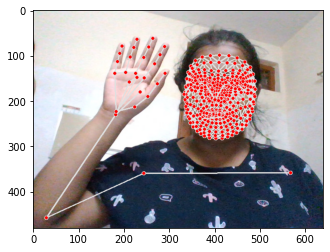

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


# 3. Extract Keypoint Values

In [12]:
results.pose_landmarks.landmark

[x: 0.6272782
y: 0.41142446
z: -1.2314547
visibility: 0.99992096
, x: 0.66434556
y: 0.3312541
z: -1.1281115
visibility: 0.999824
, x: 0.68459654
y: 0.33339104
z: -1.1280096
visibility: 0.9997098
, x: 0.70376074
y: 0.33692762
z: -1.1280019
visibility: 0.9997383
, x: 0.59270215
y: 0.3343387
z: -1.1181728
visibility: 0.99987274
, x: 0.56710255
y: 0.33799824
z: -1.11779
visibility: 0.9998666
, x: 0.5450158
y: 0.3426635
z: -1.1181962
visibility: 0.9999225
, x: 0.74060786
y: 0.38156542
z: -0.5516726
visibility: 0.9996179
, x: 0.52055156
y: 0.38639587
z: -0.47941
visibility: 0.99993
, x: 0.6653177
y: 0.49154532
z: -1.0303695
visibility: 0.9998795
, x: 0.5750788
y: 0.49816352
z: -1.0134947
visibility: 0.9999378
, x: 0.88778603
y: 0.74664944
z: -0.22988148
visibility: 0.99553496
, x: 0.38252592
y: 0.74871033
z: -0.2646435
visibility: 0.99962765
, x: 1.0869365
y: 1.178535
z: -0.18853745
visibility: 0.36641565
, x: 0.045801554
y: 0.9537769
z: -1.0564142
visibility: 0.99365264
, x: 1.1753048
y: 1.

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose

[array([ 0.62727821,  0.41142446, -1.23145473,  0.99992096]),
 array([ 0.66434556,  0.33125409, -1.12811148,  0.99982399]),
 array([ 0.68459654,  0.33339104, -1.12800956,  0.99970978]),
 array([ 0.70376074,  0.33692762, -1.12800193,  0.99973828]),
 array([ 0.59270215,  0.33433869, -1.11817276,  0.99987274]),
 array([ 0.56710255,  0.33799824, -1.11778998,  0.9998666 ]),
 array([ 0.54501581,  0.3426635 , -1.11819625,  0.99992251]),
 array([ 0.74060786,  0.38156542, -0.55167258,  0.99961787]),
 array([ 0.52055156,  0.38639587, -0.47940999,  0.99993002]),
 array([ 0.66531771,  0.49154532, -1.03036952,  0.99987948]),
 array([ 0.57507879,  0.49816352, -1.01349473,  0.99993777]),
 array([ 0.88778603,  0.74664944, -0.22988148,  0.99553496]),
 array([ 0.38252592,  0.74871033, -0.26464349,  0.99962765]),
 array([ 1.08693647,  1.17853498, -0.18853745,  0.36641565]),
 array([ 0.04580155,  0.9537769 , -1.05641425,  0.99365264]),
 array([ 1.17530477,  1.52060866, -0.40478808,  0.23054808]),
 array([

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.62727821,  0.41142446, -1.23145473, ...,  0.30723655,
        0.16489927, -0.03089633])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'rock'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [151]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #  print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()                   
                    

In [128]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'thanks': 1, 'rock': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(90, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y.shape

(90, 3)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
res = [.7, 0.2, 0.1]

In [38]:
actions[np.argmax(res)]

'hello'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 106ms/step - loss: 1.1478 - categorical_accuracy: 0.2706
Epoch 2/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.7977 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.0869 - categorical_accuracy: 0.3647
Epoch 4/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.3167 - categorical_accuracy: 0.2471
Epoch 5/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1987 - categorical_accuracy: 0.2824
Epoch 6/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1186 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.9261 - categorical_accuracy: 0.5529
Epoch 8/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9029 - categorical_accuracy: 0.4824
Epoch 9/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.9470 - categorical_accuracy: 0.411

3/3 [==============================] - 0s 96ms/step - loss: 3.7726e-05 - categorical_accuracy: 1.0000
Epoch 74/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.5537e-05 - categorical_accuracy: 1.0000
Epoch 75/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.3485e-05 - categorical_accuracy: 1.0000
Epoch 76/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.1542e-05 - categorical_accuracy: 1.0000
Epoch 77/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.9851e-05 - categorical_accuracy: 1.0000
Epoch 78/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.7895e-05 - categorical_accuracy: 1.0000
Epoch 79/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.6749e-05 - categorical_accuracy: 1.0000
Epoch 80/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.5423e-05 - categorical_accuracy: 1.0000
Epoch 81/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4240e-05

3/3 [==============================] - 0s 93ms/step - loss: 5.9672e-06 - categorical_accuracy: 1.0000
Epoch 144/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.8522e-06 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.7723e-06 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.6418e-06 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.5409e-06 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.4665e-06 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.3586e-06 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.2674e-06 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.18

3/3 [==============================] - 0s 94ms/step - loss: 2.3407e-06 - categorical_accuracy: 1.0000
Epoch 214/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.3252e-06 - categorical_accuracy: 1.0000
Epoch 215/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.3014e-06 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.2776e-06 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2551e-06 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.2341e-06 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2173e-06 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.1976e-06 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.1

3/3 [==============================] - 0s 98ms/step - loss: 1.2818e-06 - categorical_accuracy: 1.0000
Epoch 284/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.2692e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.2608e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.2524e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.2454e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.2370e-06 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.2187e-06 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.2131e-06 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.2

3/3 [==============================] - 0s 101ms/step - loss: 7.8678e-07 - categorical_accuracy: 1.0000
Epoch 353/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.8397e-07 - categorical_accuracy: 1.0000
Epoch 354/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.7976e-07 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 103ms/step - loss: 7.7556e-07 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.6714e-07 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 99ms/step - loss: 7.6574e-07 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.6293e-07 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.5452e-07 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.

Epoch 422/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.3574e-07 - categorical_accuracy: 1.0000
Epoch 423/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.3153e-07 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 100ms/step - loss: 5.2732e-07 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.2452e-07 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.2171e-07 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.1891e-07 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.1330e-07 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.1190e-07 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 99ms/s

Epoch 492/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.7866e-07 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.7726e-07 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.7586e-07 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.7446e-07 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.7446e-07 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.7165e-07 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.7165e-07 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.7025e-07 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 94ms/st

Epoch 562/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.8330e-07 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.8189e-07 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.7909e-07 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.7909e-07 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.7909e-07 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.7769e-07 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.7628e-07 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.7628e-07 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 96ms/st

Epoch 632/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2019e-07 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.1458e-07 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.1458e-07 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.1458e-07 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.1458e-07 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.1317e-07 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.1317e-07 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 95ms/st

Epoch 702/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.6970e-07 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.6549e-07 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.6409e-07 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 94ms/st

Epoch 772/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 777/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.3604e-07 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.3604e-07 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 96ms/s

3/3 [==============================] - 0s 94ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0799e-07 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.07

3/3 [==============================] - 0s 96ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 914/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 915/2000
3/3 [==============================] - 0s 101ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 916/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.6953e-08 - categorical_accuracy: 1.0000
Epoch 917/2000
3/3 [==============================] - 0s 98ms/step - loss: 8.6953e-08 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.6953e-08 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 95ms/step - loss: 

3/3 [==============================] - 0s 94ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 984/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 95ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 94ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.4

3/3 [==============================] - 0s 94ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1051/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1052/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1053/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1054/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1055/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1056/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 93ms/step - lo

3/3 [==============================] - 0s 96ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1120/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1121/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1122/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1123/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 95ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 93ms/step - loss: 5.3294e-08 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 96ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1189/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1190/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1191/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1192/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1193/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1194/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.7684e-08 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 94ms/step - lo

3/3 [==============================] - 0s 97ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1258/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1259/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1260/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1261/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 98ms/step - lo

3/3 [==============================] - 0s 102ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1327/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1328/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1329/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1330/2000
3/3 [==============================] - 0s 66ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1331/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1332/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 98ms/step 

3/3 [==============================] - 0s 92ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1396/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1397/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1398/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1399/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1400/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.5244e-08 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 96ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 1.9634e-08 - categorical_accuracy: 1.0000
Epoch 1465/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9634e-08 - categorical_accuracy: 1.0000
Epoch 1466/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.9634e-08 - categorical_accuracy: 1.0000
Epoch 1467/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9634e-08 - categorical_accuracy: 1.0000
Epoch 1468/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.9634e-08 - categorical_accuracy: 1.0000
Epoch 1469/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1470/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1471/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 96ms/step - lo

3/3 [==============================] - 0s 99ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1534/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1535/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1536/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1537/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 95ms/step - lo

3/3 [==============================] - 0s 97ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1603/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1604/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1605/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1606/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1607/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1608/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1609/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.4025e-08 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 89ms/step - lo

3/3 [==============================] - 0s 94ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1672/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1673/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1674/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1675/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 95ms/step - lo

3/3 [==============================] - 0s 98ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1741/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1742/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1743/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1744/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1745/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1746/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1747/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1220e-08 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 96ms/step - l

3/3 [==============================] - 0s 95ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1810/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1811/2000
3/3 [==============================] - 0s 101ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1812/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1813/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 96ms/step - l

3/3 [==============================] - 0s 92ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1879/2000
3/3 [==============================] - 0s 92ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1880/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1881/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1882/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1883/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1884/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1885/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 98ms/step - lo

3/3 [==============================] - 0s 96ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1948/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1949/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1950/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 98ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 96ms/step - lo

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [42]:
res = model.predict(X_test)

1/1 [==============================] - 1s 860ms/step


In [43]:
actions[np.argmax(res[3])]

'rock'

In [44]:
actions[np.argmax(y_test[3])]

'rock'

# 9. Save Weights

In [45]:
model.save('action.h5')

In [46]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 32ms/step


In [49]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
ytrue

[1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0]

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [52]:
#Redendering the probablities
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

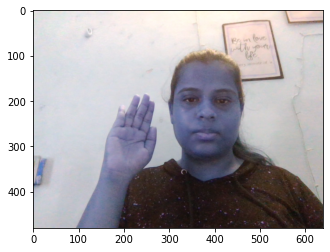

In [57]:
plt.imshow(frame)

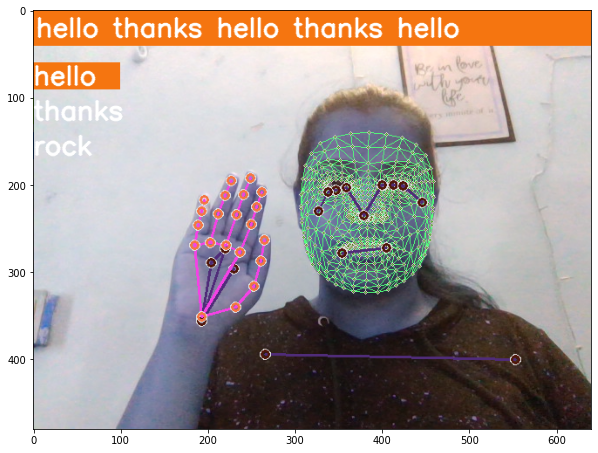

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res, actions, image, colors))

In [79]:
sequence.reverse()

In [80]:
len(sequence)

30

In [81]:
sequence.append('def')

In [82]:
sequence.reverse()

In [84]:
sequence[-30:]

[array([ 0.61482871,  0.54093564, -0.81732404, ...,  0.25296766,
         0.30870575,  0.03446231]),
 array([ 0.6246314 ,  0.54118371, -0.87946242, ...,  0.24255365,
         0.28189692,  0.00924538]),
 array([ 0.64417136,  0.54131889, -0.9064852 , ...,  0.24396574,
         0.27926704,  0.00650441]),
 array([ 6.48957729e-01,  5.41409552e-01, -8.98856640e-01, ...,
         2.41399765e-01,  2.80191094e-01, -3.25532092e-05]),
 array([ 6.56967938e-01,  5.41581094e-01, -1.05984759e+00, ...,
         2.28321716e-01,  2.89801747e-01, -9.91320121e-04]),
 array([ 0.66241759,  0.5417105 , -1.01109314, ...,  0.22255753,
         0.28562805, -0.00317623]),
 array([ 0.66045809,  0.54185325, -0.97901887, ...,  0.22235274,
         0.28805202, -0.00990047]),
 array([ 0.66054398,  0.54193771, -0.96782351, ...,  0.1957088 ,
         0.31401291, -0.04838775]),
 array([ 0.66203034,  0.54223156, -0.69130117, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.66555136,  0.54244518, -0.700146

In [53]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.6

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'media

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.sol

1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
rock
<class 'mediapipe.python.solu

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=====================

1/1 [==============================] - 0s 27ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'media

1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'media

1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 25ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solut

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'media

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.pyth

rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=====================

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'media

1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rock
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'media

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.pyt

1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapi

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 19ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.s

1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'media

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello


In [184]:
model.predict(np.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 21ms/step


array([[1.8850454e-06, 9.9999809e-01, 4.6466893e-09]], dtype=float32)